# E3: Wu & Palmer 1994

The Wu & Palmer similarity measures the depth of two given concepts in the WordNet taxonomy and the depth of the least common subsumer (LCS) [1],
and combines these into a similarity score.

$$
Sim_{wup} = \frac{2 * depth(LCS)}{depth(concept_{1}) + depth(concept_{2})}
$$

The LCS is the most specific concept which is an ancestor of both $concept_{1}$ and $concept_{2}$.

For example.
1. The concept Automobile is an ancestor of Car. Car has a depth of 3 and Automobile has a depth of 2.
2. Vehicle is an ancestor of Boat and Automobile. (Vehicle depth = 1, Boat depth = 2, Object depth = 0)

```
    Object
      |
    Vehicle
      |
  ---------
  |       |
 Boat  Automobile
          |
         Car
```

Thus the Least Common Subsumer (Ancestor) of *Car* and *Boat* is *Vehicle*.
So the *WU Palmer Similarity* of `WUPS(Boat, Car)` = $\frac{2\cdot 1}{2 + 3} = 0.4$.

Intuitively, words which are very close in meaning say *dog* and *canine* will have a LCS with a high depth and their respective value will approach one. For words whose LCS is the root of the wordnet node hierarchy they will have a similarity of 0.

#### REFERENCES
1. [Wu & Palmer - Verb Semantics and Lexical Selection](./papers/Wu_Palmer_1994-verb-semantics-and-lexical-selection.pdf)
2. [Least Common Subsumer](https://stackoverflow.com/questions/18629469/what-is-least-common-subsumer-and-how-to-compute-it)

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import pandas as pd
import numpy as np
import libs.stats as stats
import libs.preprocessing as pp
import libs.data as data
import libs.utils as utils
import exp_libs.wordnet as wn
import spacy
from importlib import reload

In [2]:
df_en = data.load_dataframe("../../../datasets/final/en/asag_v2_en_filter.csv")
display(df_en.head(1))
nlp_en = spacy.load('en')

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

### Exp. 1: Lang=English, Lexical_Matching=False

In [3]:
res1 = wn.run_entailment_model(nlp_en, df_en, sim_fn=wn.wup_similarity, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.


In [25]:
stats.print_all_stats(res1['y_true'], res1['y_pred'])

exp1_data = stats.get_all_stats(res1['y_true'], res1['y_pred'])
# %store exp1_data

stats.plot_confusion_matrix(stats.cm(res1['y_true'], res1['y_pred']), classes=np.arange(6))

             precision    recall  f1-score   support

        0.0       0.03      0.14      0.05        14
        1.0       0.00      0.00      0.00         8
        2.0       0.15      0.13      0.14       234
        3.0       0.08      0.32      0.13       157
        4.0       0.31      0.28      0.29       676
        5.0       0.42      0.23      0.30       921

avg / total       0.32      0.24      0.26      2010

Pearson's R: 0.12713561399112114
Cohen's Kappa: -0.016951506561756036
MAE: 0.5313432835820896
Accuracy: 23.88%
Precision: 32.05%
Recall: 23.88%
F1-Measure: 26.03%


In [24]:
## Store Results
data.save('../tmp/e3_exp_01', res1)
data.load('../tmp/e3_exp_01')

{'y_pred': array([3, 3, 4, ..., 0, 4, 3]),
 'y_pred_raw': array([0.51024384, 0.68468683, 0.83216783, ..., 0.        , 0.71794872,
        0.52189349]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}

### Exp. 3: Lang=English, Lexical_Matching=False, MA=3

In [17]:
reload(wn)
res2 = wn.run_entailment_model_k(nlp_en, df_en, sim_fn=wn.wup_similarity, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'],
                                  ma_count=3)

batch: 100 done.
batch: 200 done.
batch: 300 done.
batch: 400 done.
batch: 500 done.
batch: 600 done.
batch: 700 done.
batch: 800 done.
batch: 900 done.
batch: 1000 done.
batch: 1100 done.
batch: 1200 done.
batch: 1300 done.
batch: 1400 done.
batch: 1500 done.
batch: 1600 done.
batch: 1700 done.
batch: 1800 done.
batch: 1900 done.
batch: 2000 done.


             precision    recall  f1-score   support

        0.0       0.06      0.14      0.08        14
        1.0       0.00      0.00      0.00         8
        2.0       0.27      0.06      0.10       234
        3.0       0.10      0.26      0.14       157
        4.0       0.34      0.37      0.35       676
        5.0       0.47      0.39      0.42       921

avg / total       0.37      0.33      0.34      2010

Pearson's R: 0.13642046458185003
Cohen's Kappa: 0.02066539581747484
MAE: 0.07711442786069651
Accuracy: 32.94%
Precision: 36.87%
Recall: 32.94%
F1-Measure: 33.61%


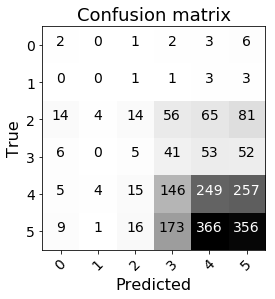

In [18]:
stats.print_all_stats(res2['y_true'], res2['y_pred'])

exp2_data = stats.get_all_stats(res2['y_true'], res2['y_pred'])
# %store exp2_data

stats.plot_confusion_matrix(stats.cm(res2['y_true'], res2['y_pred']), classes=np.arange(6))

In [21]:
## Store Results
data.save('../tmp/e3_exp_02', res2)
data.load('../tmp/e3_exp_02')

{'y_pred': array([3, 3, 4, ..., 0, 4, 3]),
 'y_pred_raw': array([0.55481146, 0.68468683, 0.83216783, ..., 0.        , 0.71794872,
        0.52189349]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}

### Exp. 2: Lang=Spanish, Lexical_Matching=False

In [22]:
df_es = pd.read_csv("../../../datasets/final/es/asag_v2_es_filter.csv", sep='~', index_col=False)
display(df_es.head(1))
nlp_es = spacy.load('es')

ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [23]:
res3 = wn.run_entailment_model(nlp_es, df_es, sim_fn=wn.wup_similarity, 
                                  lang='spa',
                                  stop_words=pp.ES_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.


In [26]:
stats.print_all_stats(res3['y_true'], res3['y_pred'])
exp3_data = stats.get_all_stats(res3['y_true'], res3['y_pred'])
# %store exp3_data
stats.plot_confusion_matrix(stats.cm(res3['y_true'], res3['y_pred']), classes=np.arange(6))

             precision    recall  f1-score   support

        0.0       0.13      0.86      0.22        14
        1.0       0.01      0.38      0.02         8
        2.0       0.14      0.45      0.22       234
        3.0       0.06      0.17      0.08       157
        4.0       0.30      0.11      0.16       676
        5.0       0.47      0.05      0.08       921

avg / total       0.34      0.13      0.12      2010

Pearson's R: 0.1472799604260723
Cohen's Kappa: 0.006851552523619797
MAE: 1.7502487562189055
Accuracy: 13.08%
Precision: 33.53%
Recall: 13.08%
F1-Measure: 12.50%


In [27]:
## Store Results
data.save('../tmp/e3_exp_03', res3)
data.load('../tmp/e3_exp_03')

{'y_pred': array([2, 3, 3, ..., 0, 3, 2]),
 'y_pred_raw': array([0.42079772, 0.51826923, 0.63043018, ..., 0.        , 0.69230769,
        0.45454545]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}